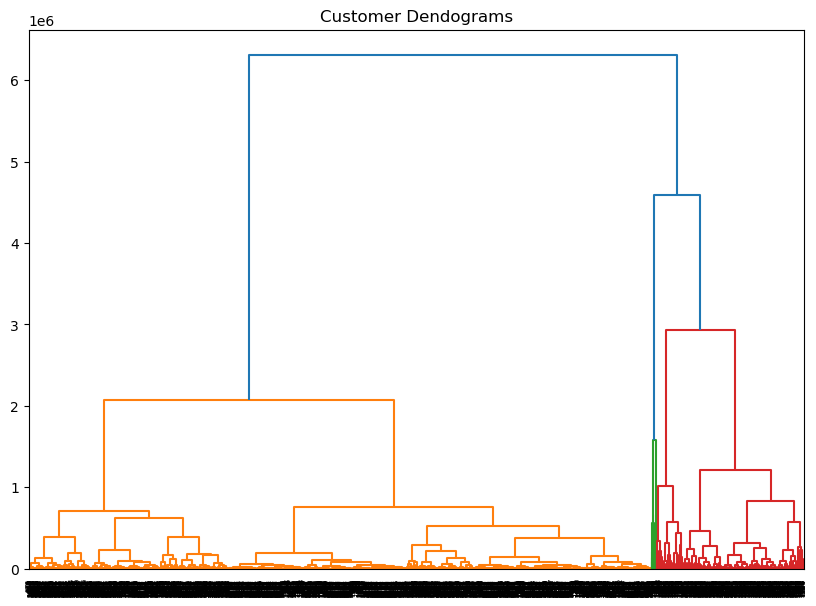

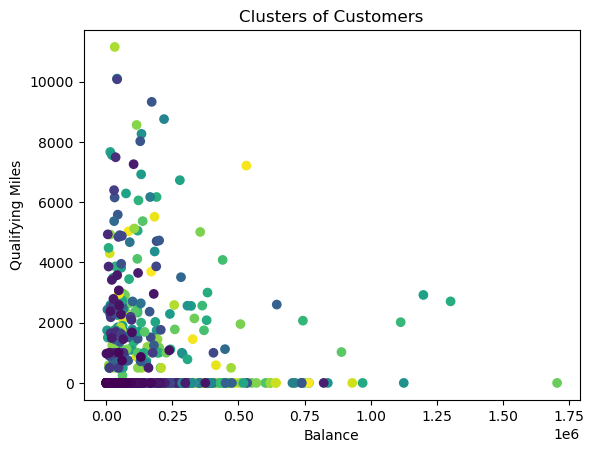

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Step 1: Load the data
data = pd.read_excel('EastWestAirlines.xlsx')

# Step 2: Data Preprocessing
# Drop unnecessary columns
data.drop(['ID'], axis=1, inplace=True)
# Convert categorical columns to numerical
data['cc1_miles'] = pd.to_numeric(data['cc1_miles'], errors='coerce')
data['cc2_miles'] = pd.to_numeric(data['cc2_miles'], errors='coerce')
data['cc3_miles'] = pd.to_numeric(data['cc3_miles'], errors='coerce')
# Handling missing values
data.fillna(0, inplace=True)

# Step 3: Feature Selection
# Select relevant features for clustering
features = ['Balance', 'Qual_mile', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
            'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
            'Days_since_enrolled']

# Step 4: Clustering Algorithm
# Perform hierarchical clustering using Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=50).fit(data[features])

# Step 5: Visualize Clusters
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data[features], method='ward'))
plt.show()

# Optional: Assign cluster labels to the original data
data['Cluster_Labels'] = clustering.labels_

# Step 6: Visualize Clusters in 2D (you can choose any two features for visualization)
plt.scatter(data['Balance'], data['Qual_mile'], c=data['Cluster_Labels'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.title('Clusters of Customers')
plt.show()


In [4]:
##clustering with kmeans

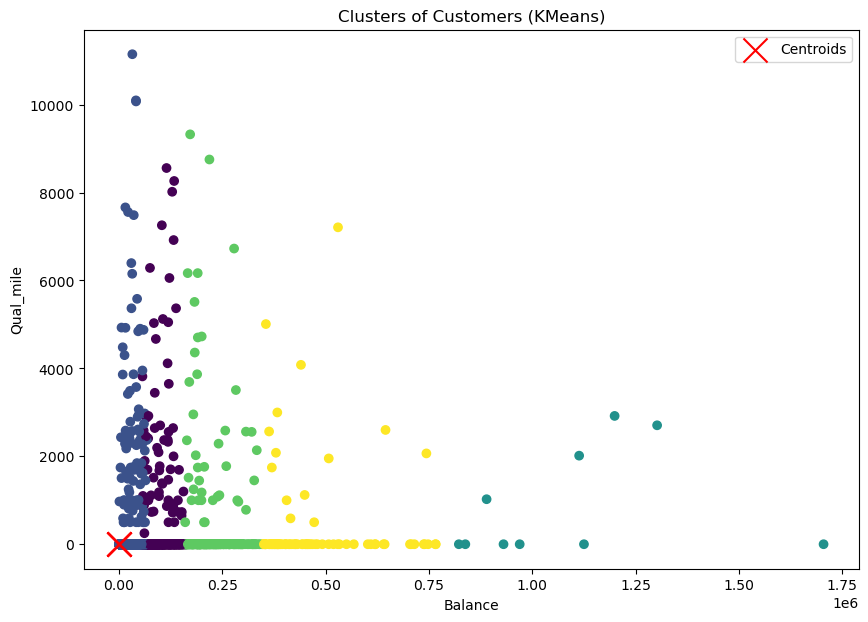

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_excel('EastWestAirlines.xlsx')

# Step 2: Data Preprocessing
# Convert categorical columns to numerical
data['cc1_miles'] = pd.to_numeric(data['cc1_miles'], errors='coerce')
data['cc2_miles'] = pd.to_numeric(data['cc2_miles'], errors='coerce')
data['cc3_miles'] = pd.to_numeric(data['cc3_miles'], errors='coerce')
# Handling missing values
data.fillna(0, inplace=True)

# Step 3: Feature Selection
# Select relevant features for clustering
features = ['Balance', 'Qual_mile', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
            'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
            'Days_since_enrolled']

# Step 4: Clustering Algorithm (KMeans)
# Specify the number of clusters
n_clusters = 5
# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Fit the model to the data
kmeans.fit(data[features])

# Step 5: Visualize Clusters in 2D (you can choose any two features for visualization)
# Choose two features for visualization
feature1 = 'Balance'
feature2 = 'Qual_mile'

# Visualize clusters
plt.figure(figsize=(10, 7))
plt.scatter(data[feature1], data[feature2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, data.columns.get_loc(feature1)], 
            kmeans.cluster_centers_[:, data.columns.get_loc(feature2)], 
            s=300, c='red', marker='x', label='Centroids')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Clusters of Customers (KMeans)')
plt.legend()
plt.show()


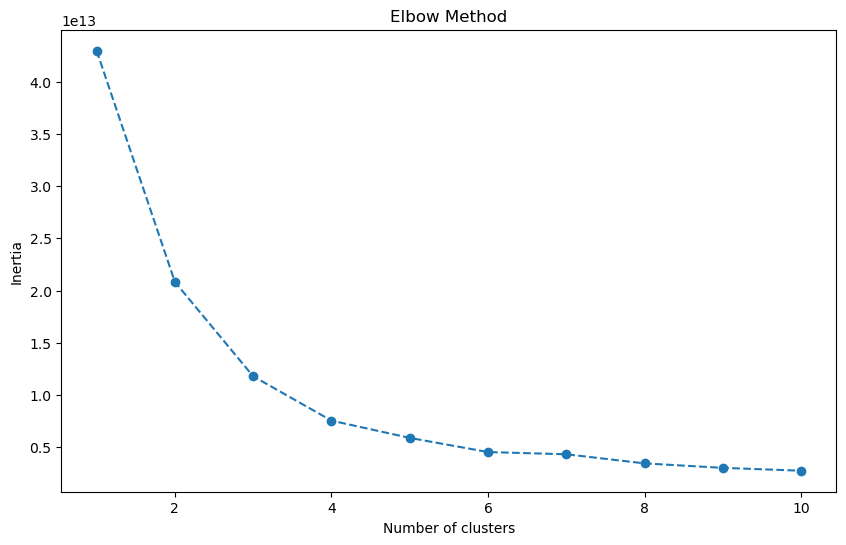

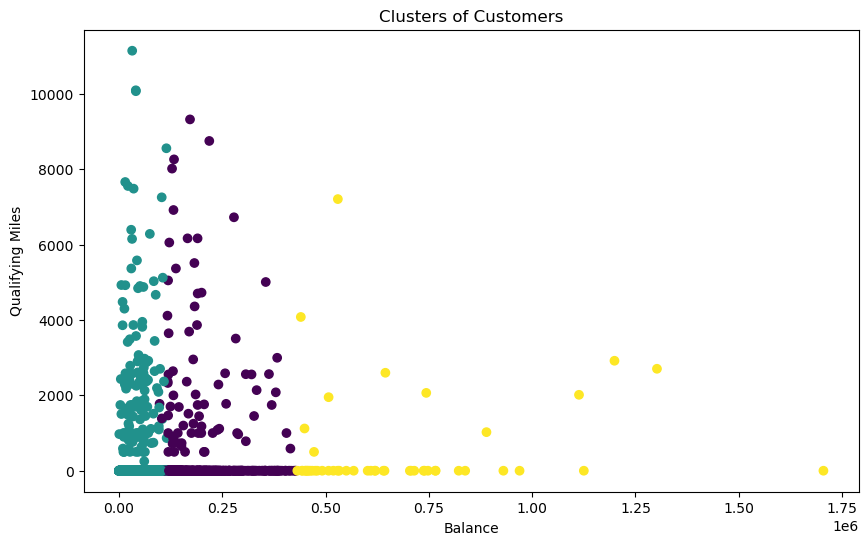

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_excel('EastWestAirlines.xlsx')

# Step 2: Data Preprocessing
# Convert categorical columns to numerical if needed
data['cc1_miles'] = pd.to_numeric(data['cc1_miles'], errors='coerce')
data['cc2_miles'] = pd.to_numeric(data['cc2_miles'], errors='coerce')
data['cc3_miles'] = pd.to_numeric(data['cc3_miles'], errors='coerce')

# Handling missing values
data.fillna(0, inplace=True)

# Step 3: Feature Selection
# Select relevant features for clustering
features = ['Balance', 'Qual_mile', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
            'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
            'Days_since_enrolled']

# Step 4: Clustering Algorithm
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(data[features])

# Step 5: Elbow Method for Optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[features])
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Step 6: Scatter plot for Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_mile'], c=data['Cluster_Labels'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.title('Clusters of Customers')
plt.show()


In [8]:
##clustering with dbscans

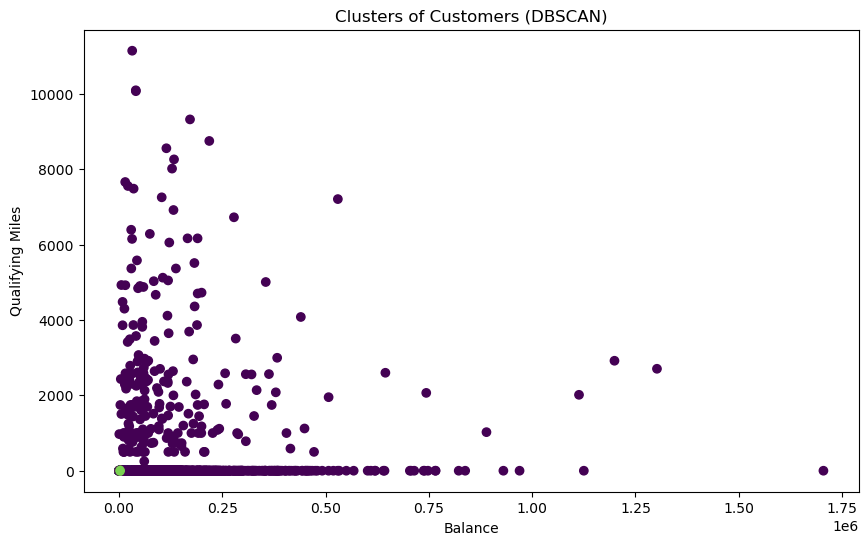

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_excel('EastWestAirlines.xlsx')

# Step 2: Data Preprocessing
# Convert categorical columns to numerical if needed
data['cc1_miles'] = pd.to_numeric(data['cc1_miles'], errors='coerce')
data['cc2_miles'] = pd.to_numeric(data['cc2_miles'], errors='coerce')
data['cc3_miles'] = pd.to_numeric(data['cc3_miles'], errors='coerce')

# Handling missing values
data.fillna(0, inplace=True)

# Step 3: Feature Selection
# Select relevant features for clustering
features = ['Balance', 'Qual_mile', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
            'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
            'Days_since_enrolled']

# Step 4: Clustering Algorithm (DBSCAN)
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=500, min_samples=5)
data['Cluster_Labels'] = dbscan.fit_predict(data[features])

# Step 5: Scatter plot for Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Balance'], data['Qual_mile'], c=data['Cluster_Labels'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.title('Clusters of Customers (DBSCAN)')
plt.show()


In [11]:

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(data['Balance'], data['Qual_mile'], c=clusters, cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.title('DBSCAN Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

# Visualize core samples and noise points
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
noise_points = ~core_samples_mask

plt.figure(figsize=(10, 7))
plt.scatter(data['Balance'][core_samples_mask], data['Qual_mile'][core_samples_mask], c='green', label='Core Samples')
plt.scatter(data['Balance'][noise_points], data['Qual_mile'][noise_points], c='red', label='Noise Points')
plt.xlabel('Balance')
plt.ylabel('Qualifying Miles')
plt.title('Core Samples and Noise Points')
plt.legend()
plt.show()

# Reachability Plot
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data[features])
distances, indices = nbrs.kneighbors(data[features])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.title('Reachability Plot')
plt.show()

# Silhouette Plot
silhouette_avg = silhouette_score(data[features], clusters)
sample_silhouette_values = silhouette_samples(data[features], clusters)
y_lower = 10

plt.figure(figsize=(10, 7))
for i in range(len(set(clusters))):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / len(set(clusters)))
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette plot for DBSCAN Clustering")
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.show()


NameError: name 'clusters' is not defined

<Figure size 1000x700 with 0 Axes>